Importing Data Libraries



In [93]:
import pandas as pd
import numpy as np
import seaborn as sns

Data Importing

In [94]:
df=pd.read_csv("Animal Health.csv")

In [95]:
df.shape

(871, 7)

In [96]:
df

,AnimalName,BloodBrainDisease,AppearenceDisease,GeneralDisease,LungDisease,AbdominalDisease,HealthStatus
0,Dog,anemia,swelling,fever,difficulty in breathing,uteria inertia,Critical
1,Dog,anemia,emaciation,loss of appetite,difficulty in breathing,ulcers,Critical
2,Dog,jaundice,hairloss,loss of appetite,halitosis,ulcers,Critical
3,Dog,wasting,ruffled feathers,pains,pneumonia,uteria inertia,Critical
4,Dog,convulsions,scabs,weakness,dyspnea,fetopelvic disproportion,Critical
...,...,...,...,...,...,...,...
866,Buffaloes,seizures,hairloss,weakness,nasal discharge,diarrhea,Critical
867,Buffaloes,convulsions,ruffled feathers,sweating,pneumonia,ulcers,Critical
868,Buffaloes,wasting,hairloss,headache,pneumonia,ulcers,Critical
869,Buffaloes,anemia,hairloss,loss of appetite,difficulty in breathing,diarrhea,Critical


Data Pre-processing

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AnimalName         871 non-null    object
 1   BloodBrainDisease  871 non-null    object
 2   AppearenceDisease  871 non-null    object
 3   GeneralDisease     871 non-null    object
 4   LungDisease        871 non-null    object
 5   AbdominalDisease   871 non-null    object
 6   HealthStatus       869 non-null    object
dtypes: object(7)
memory usage: 47.8+ KB


In [98]:
df.describe()

,AnimalName,BloodBrainDisease,AppearenceDisease,GeneralDisease,LungDisease,AbdominalDisease,HealthStatus
count,871,871,871,871,871,871,869
unique,46,5,6,13,6,6,2
top,Buffaloes,anemia,emaciation,vomiting,halitosis,upset stomach,Critical
freq,129,207,168,79,173,164,849


In [99]:
df.nunique()

AnimalName           46
BloodBrainDisease     5
AppearenceDisease     6
GeneralDisease       13
LungDisease           6
AbdominalDisease      6
HealthStatus          2
dtype: int64

In [100]:
df.isnull().sum()

AnimalName           0
BloodBrainDisease    0
AppearenceDisease    0
GeneralDisease       0
LungDisease          0
AbdominalDisease     0
HealthStatus         2
dtype: int64

In [101]:
df.columns

Index(['AnimalName', 'BloodBrainDisease', 'AppearenceDisease',
       'GeneralDisease', 'LungDisease', 'AbdominalDisease', 'HealthStatus'],
      dtype='object')

Filling Missing Values

In [102]:
df['HealthStatus'].unique()

array(['Critical', 'Normal', nan], dtype=object)

In [103]:
df['HealthStatus'].value_counts()

HealthStatus
Critical    849
Normal       20
Name: count, dtype: int64

In [104]:
df['HealthStatus'].fillna('Critical',inplace=True)

In [105]:
df.isnull().sum()

AnimalName           0
BloodBrainDisease    0
AppearenceDisease    0
GeneralDisease       0
LungDisease          0
AbdominalDisease     0
HealthStatus         0
dtype: int64

Vizualisation

<Axes: xlabel='AnimalName'>

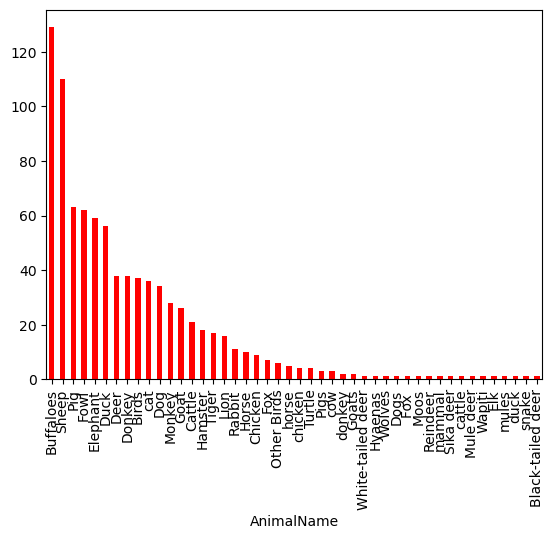

In [106]:
df['AnimalName'].value_counts().plot(kind='bar',color='Red')

<Axes: >

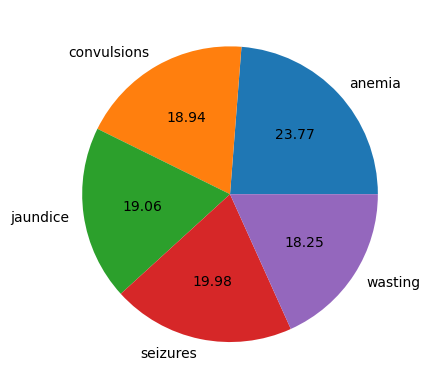

In [107]:
df.groupby('BloodBrainDisease').size().plot(kind='pie', autopct='%.2f')

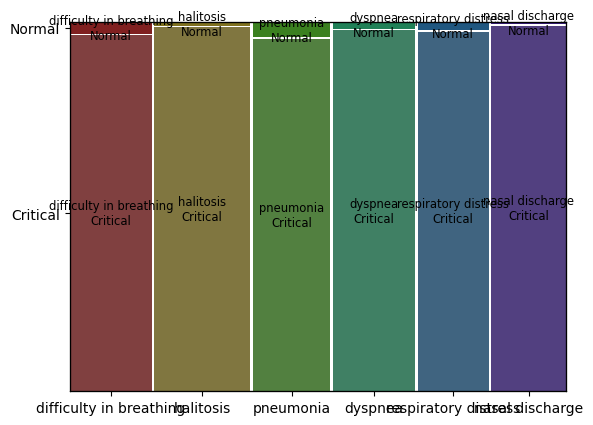

In [108]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['LungDisease','HealthStatus'])
plt.show()

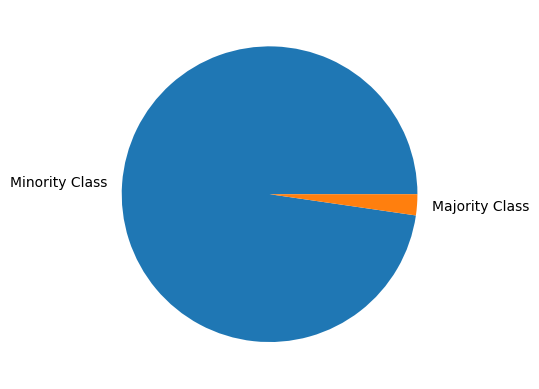

In [109]:
class_division = [ df[df['HealthStatus'] == 'Critical' ].shape[0], df[df['HealthStatus'] == 'Normal' ].shape[0] ]
my_labels = ['Minority Class', 'Majority Class']

plt.pie(class_division, labels = my_labels)
plt.show()


In [110]:
print("Proportion of Minority Class: " + str(round(df[df['HealthStatus'] == 'Normal' ].shape[0]/df.shape[0] * 100, 2)) + "%")

Proportion of Minority Class: 2.3%


In [111]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [112]:
df.columns

Index(['AnimalName', 'BloodBrainDisease', 'AppearenceDisease',
       'GeneralDisease', 'LungDisease', 'AbdominalDisease', 'HealthStatus'],
      dtype='object')

In [113]:
df['AnimalName']=le.fit_transform(df['AnimalName'])

In [114]:
df['BloodBrainDisease']=le.fit_transform(df['BloodBrainDisease'])
df['AppearenceDisease']=le.fit_transform(df['AppearenceDisease'])
df['GeneralDisease']=le.fit_transform(df['GeneralDisease'])
df['LungDisease']=le.fit_transform(df['LungDisease'])
df['AbdominalDisease']=le.fit_transform(df['AbdominalDisease'])
df['HealthStatus']=le.fit_transform(df['HealthStatus'])

In [115]:
df

,AnimalName,BloodBrainDisease,AppearenceDisease,GeneralDisease,LungDisease,AbdominalDisease,HealthStatus
0,6,0,4,2,0,5,0
1,6,0,0,4,0,3,0
2,6,2,1,4,2,3,0
3,6,4,2,6,4,5,0
4,6,1,3,12,1,2,0
...,...,...,...,...,...,...,...
866,2,3,1,12,3,1,0
867,2,1,2,10,4,3,0
868,2,4,1,3,4,3,0
869,2,0,1,4,0,1,0


<Axes: >

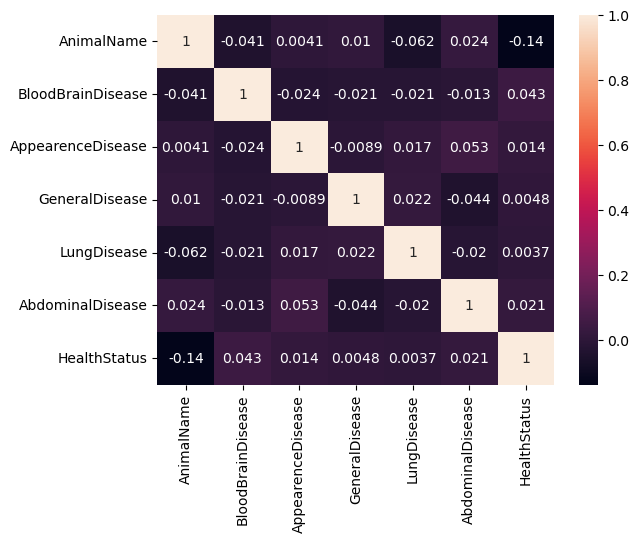

In [116]:
sns.heatmap(df.corr(),annot=True)

In [117]:
x = df.drop(['HealthStatus'],axis=1)
y = df['HealthStatus']

In [118]:
from sklearn.preprocessing import StandardScaler
stx= StandardScaler()
X = stx.fit_transform(x)

Splitting data

In [119]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)

In [120]:
print("Proportion of Minority Class in train set: " + str(round(ytrain.sum()/len(ytrain) * 100, 2)) + "%")
print("Proportion of Minority Class in test set: " + str(round(ytest.sum()/len(ytest) * 100, 2)) + "%")

Proportion of Minority Class in train set: 2.3%
Proportion of Minority Class in test set: 2.29%


In [146]:
! python --version

Python 3.11.5


In [148]:
conda update --all

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(188): Could not remove or rename C:\Users\boina\anaconda3\pkgs\icu-73.1-h6c2663c_0\Library\bin\icudt73.dll.  Please remove this file manually (you may need to reboot to free file handles)

InvalidArchiveError("Error with archive C:\\Users\\boina\\anaconda3\\pkgs\\jsonschema-specifications-2023.7.1-py311haa95532_0.conda.  You probably need to delete and re-download or re-create this file.  Message was:\n\nfailed with error: [Errno 2] No such file or directory: 'C:\\\\Users\\\\boina\\\\anaconda3\\\\pkgs\\\\jsonschema-specifications-2023.7.1-py311haa95532_0.conda'")
EOFError()
EOFError()



Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\boina\anaconda3


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    anaconda-anon-usage-0.4.3  |py311hfc23b7f_100          28 KB
    anaconda-cloud-auth-0.1.4  |  py311haa95532_0          39 KB
    astropy-5.3.4              |  py311hd7041d2_0         9.7 MB
    attrs-23.1.0               |  py311haa95532_0         165 KB
    boost-cpp-1.82.0           |       h59b6b97_2          11 KB
    brotli-python-1.0.9        |  py311hd77b12b_7         310 KB
    c-blosc2-2.10.5            |       h2f4ed9d_0         218 KB
    click-8.1.7                |  py311haa95532_0         222 KB
    conda-23.9.0               |  py311haa95532_0         1.3 MB
    conda-build-3.27.0         |  py311haa95532_0         820 KB
    conda-libmamba-solver-23.11.0|  py311haa95532_0         103 KB
    frozenlist-1.4.0       

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\boina\anaconda3


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-cpp-1.82.0           |       h59b6b97_2          11 KB
    hvplot-0.9.0               |  py311haa95532_0         3.2 MB
    icu-73.1                   |       h6c2663c_0        29.5 MB
    imageio-2.31.4             |  py311haa95532_0         632 KB
    jsonschema-4.19.2          |  py311haa95532_0         213 KB
    jsonschema-specifications-2023.7.1|  py311haa95532_0          16 KB
    libboost-1.82.0            |       h3399ecb_2        23.1 MB
    qt-main-5.15.2             |      h19c9488_10        59.4 MB
    ------------------------------------------------------------
                                           Total:       116.1 MB

The following NEW packages will be INSTALLED:

  brotli-python      pkgs/main/win-64::

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(188): Could not remove or rename C:\Users\boina\anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.  Please remove this file manually (you may need to reboot to free file handles)


In [151]:
!pip install scikit-learn

In [153]:
from imblearn.combine import SMOTEN

ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (C:\Users\boina\anaconda3\Lib\site-packages\imblearn\utils\_validation.py)

In [124]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
xbal,ybal=smote.fit_resample(xtrain,ytrain)

ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (C:\Users\boina\anaconda3\Lib\site-packages\imblearn\utils\_validation.py)

In [125]:
ybal.value_counts()

NameError: name 'ybal' is not defined

Model Fitting

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(xbal,ybal)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [ ]:
dtc.fit(xbal,ybal)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(xbal,ybal)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(xbal, ybal)

Prediction

In [ ]:
ytestpred=lr.predict(xtest)
ytrainpred=lr.predict(xtrain)

In [ ]:
ytestpredc=dtc.predict(xtest)
ytrainpredc=dtc.predict(xtrain)

In [ ]:
ytestpredr=rfc.predict(xtest)
ytrainpredr=rfc.predict(xtrain)

In [ ]:
ytestpredk=knn.predict(xtest)
ytrainpredk=knn.predict(xtrain)

Metrics

In [ ]:
ytest.value_counts()

In [ ]:
#logistic regression
cross_tab_test = pd.crosstab(ytest, ytestpred)
print("Cross-Tabulation for Test Set:\n", cross_tab_test)

cross_tab_train = pd.crosstab(ytrain, ytrainpred)
print("Cross-Tabulation for Training Set:\n", cross_tab_train)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(ytest, ytestpred))
print(classification_report(ytrain, ytrainpred))

In [ ]:
print(accuracy_score(ytest, ytestpred))
print(accuracy_score(ytrain, ytrainpred))

In [ ]:
#decision tree
pd.crosstab(ytest, ytestpredc)




In [ ]:
print(accuracy_score(ytest, ytestpredc))
print(accuracy_score(ytrain, ytrainpredc))

In [ ]:
print(classification_report(ytest, ytestpredc))
print(classification_report(ytrain, ytrainpredc))

In [ ]:
#Random forest
pd.crosstab(ytest, ytestpredr)

In [ ]:
print(accuracy_score(ytest, ytestpredr))
print(accuracy_score(ytrain, ytrainpredr))

In [ ]:
print(classification_report(ytest, ytestpredr))
print(classification_report(ytrain, ytrainpredr))

In [ ]:
#knn
pd.crosstab(ytest, ytestpredk)




In [ ]:
print(accuracy_score(ytest, ytestpredk))
print(accuracy_score(ytrain, ytrainpredk))

In [ ]:
print(classification_report(ytest, ytestpredk))
print(classification_report(ytrain, ytrainpredk))

In [ ]:
import pickle
pickle.dump(rfc,open("rfc.pkl","wb"))